# Линейная регрессия

Данные содержатся в файле `data/lin_reg.txt`. Прочитать их можно следующим так:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

D = np.loadtxt('../data/lin_reg.txt', delimiter=',')
X = D[:, :-1]
y = D[:, -1].reshape((-1, 1))
N = len(X)

При выполнении заданий **нельзя** пользоваться `scikit-learn` и т.п., только `NumPy`/`JAX`/`TF`/`PyTorch` и `matplotlib`/`seaborn`/`plotly`/etc.

1. Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации $\alpha$, используя полные данные для обучения и для тестирования. 
2. Подготовьте исходные данные для 5 fold CV.
3. С помощью CV найдите оптимальное значение $\alpha$ на какой-нибудь сетке значений.
4. Постройте валидационную кривую. 
5. Постройте кривую обучения.

# 1. Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации 𝛼, используя полные данные для обучения и для тестирования.

In [2]:
def mse(y1, y2):
    return ((y1 - y2) ** 2).mean()

def fit(X_train, y_train, X_val, y_val, alpha, epochs=500, rate=10**-6):
    theta = 0.01*np.ones((X.shape[1], 1))

    loss_list = []
    loss_val_list = []
    
    for epoch in range(epochs):
        
        # grad plus L2 regularization
        grad = (2*(X_train @ theta - y_train).T @ X_train).T + 2 * alpha * theta
        theta -= rate * grad
        
        # loss plus L2 regularization
        loss = mse(y_train, X_train @ theta) + alpha * np.sum(theta ** 2)
        loss_list.append(loss)
        
        val_loss = mse(y_val, X_val @ theta) + alpha * np.sum(theta ** 2)
        loss_val_list.append(val_loss)

    return theta, loss_list, loss_val_list

In [3]:
train_percent = 0.63

X_train = X[:int(train_percent*N)]
X_val = X[int(train_percent*N):]
y_train = y[:int(train_percent*N)]
y_val = y[int(train_percent*N):]

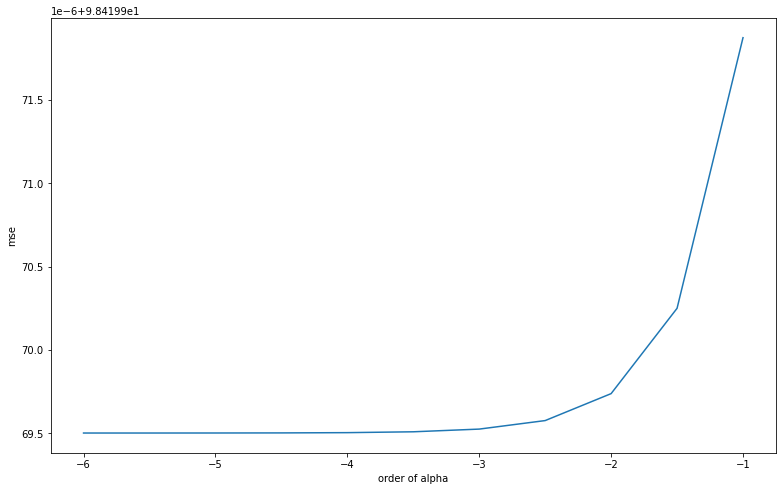

In [4]:
%matplotlib inline
mse_list = []
alphas = [10**-i for i in np.arange(1, 6.5, 0.5)]

for alpha in alphas:
    theta = fit(X_train, y_train, X_val, y_val, alpha)[0]
    mse_list.append(mse(X@theta, y))

plt.figure(figsize=(13, 8))
plt.xlabel('order of alpha')
plt.ylabel('mse')
plt.plot(np.log10(alphas), mse_list)
plt.show()

# 2. Подготовьте исходные данные для 5 fold CV.

In [5]:
fold_number = 5

X_folds = [X[:int(N/fold_number)]]
y_folds = [y[:int(N/fold_number)]]

for i in range(1, fold_number):
    X_folds.append(X[int(i * N/fold_number):int((i+1) * N/fold_number)])
    y_folds.append(y[int(i * N/fold_number):int((i+1) * N/fold_number)])
    

# 3. С помощью CV найдите оптимальное значение 𝛼 на какой-нибудь сетке значений.

In [6]:
alphas = np.linspace(0.01, 0.1, 50)

mean_loss_val = []
for alpha in alphas:
    loss_val = []

    for n in range(fold_number):
        X_train = np.concatenate(np.delete(X_folds, n, 0))
        y_train = np.concatenate(np.delete(y_folds, n, 0))
        
        X_val = X_folds[n]
        y_val = y_folds[n]
        
        theta, loss_list, loss_val_list = fit(X_train, y_train, X_val, y_val, alpha, epochs=5)
        loss_val.append(loss_val_list)
        
    mean_loss_val.append(np.array(loss_val).mean(0))

mean_loss_val = [d[-1] for d in mean_loss_val]
optimal_alpha = alphas[np.argmin(mean_loss_val)]
optimal_alpha

0.01

# 4,5 Постройте валидационную кривую и кривую обучения

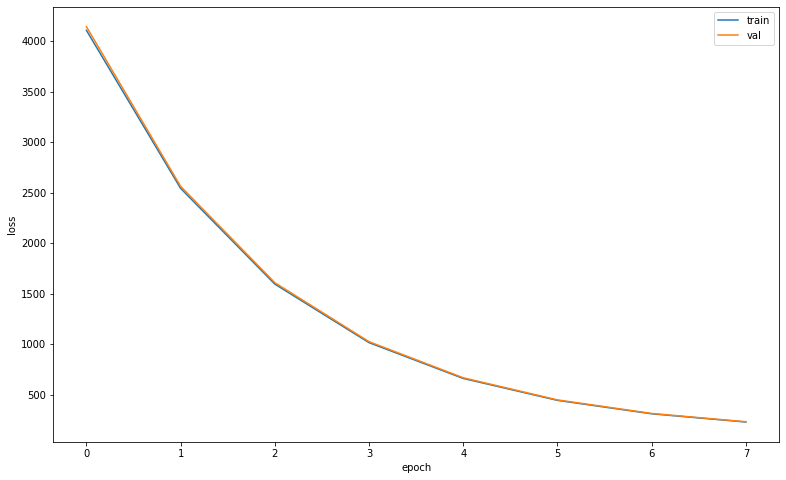

In [7]:
loss_train = []
loss_val = []

for n in range(fold_number):
        X_train = np.concatenate(np.delete(X_folds, n, 0))
        y_train = np.concatenate(np.delete(y_folds, n, 0))  
        X_val = X_folds[n]
        y_val = y_folds[n]
        
        theta, loss_list, loss_val_list = fit(X_train, y_train, X_val, y_val, optimal_alpha, epochs=8)
        loss_train.append(loss_list)
        loss_val.append(loss_val_list)
loss_train = np.array(loss_train).mean(0)
loss_val = np.array(loss_val).mean(0)

plt.figure(figsize=(13,8))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(loss_train, label='train')
plt.plot(loss_val, label='val')
plt.legend()
plt.show()